2022-03 - city-of-london: 13 burglaries
2022-03 - metropolitan: 4602 burglaries
2022-04 - city-of-london: 25 burglaries
2022-03 - metropolitan: 4602 burglaries
2022-04 - city-of-london: 25 burglaries
2022-04 - metropolitan: 4042 burglaries
2022-05 - city-of-london: 38 burglaries
2022-04 - metropolitan: 4042 burglaries
2022-05 - city-of-london: 38 burglaries
2022-05 - metropolitan: 4596 burglaries
2022-06 - city-of-london: 22 burglaries
2022-05 - metropolitan: 4596 burglaries
2022-06 - city-of-london: 22 burglaries
2022-06 - metropolitan: 4257 burglaries
2022-07 - city-of-london: 18 burglaries
2022-06 - metropolitan: 4257 burglaries
2022-07 - city-of-london: 18 burglaries
2022-07 - metropolitan: 3828 burglaries
2022-08 - city-of-london: 34 burglaries
2022-07 - metropolitan: 3828 burglaries
2022-08 - city-of-london: 34 burglaries
2022-08 - metropolitan: 4298 burglaries
2022-09 - city-of-london: 19 burglaries
2022-08 - metropolitan: 4298 burglaries
2022-09 - city-of-london: 19 burglaries


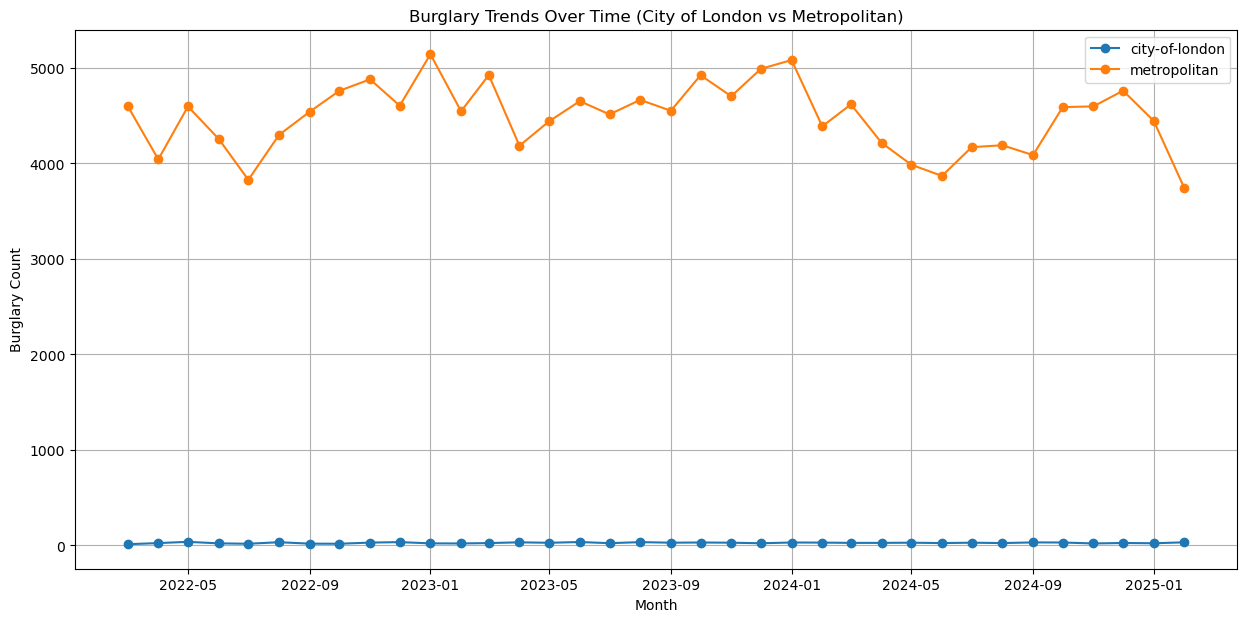

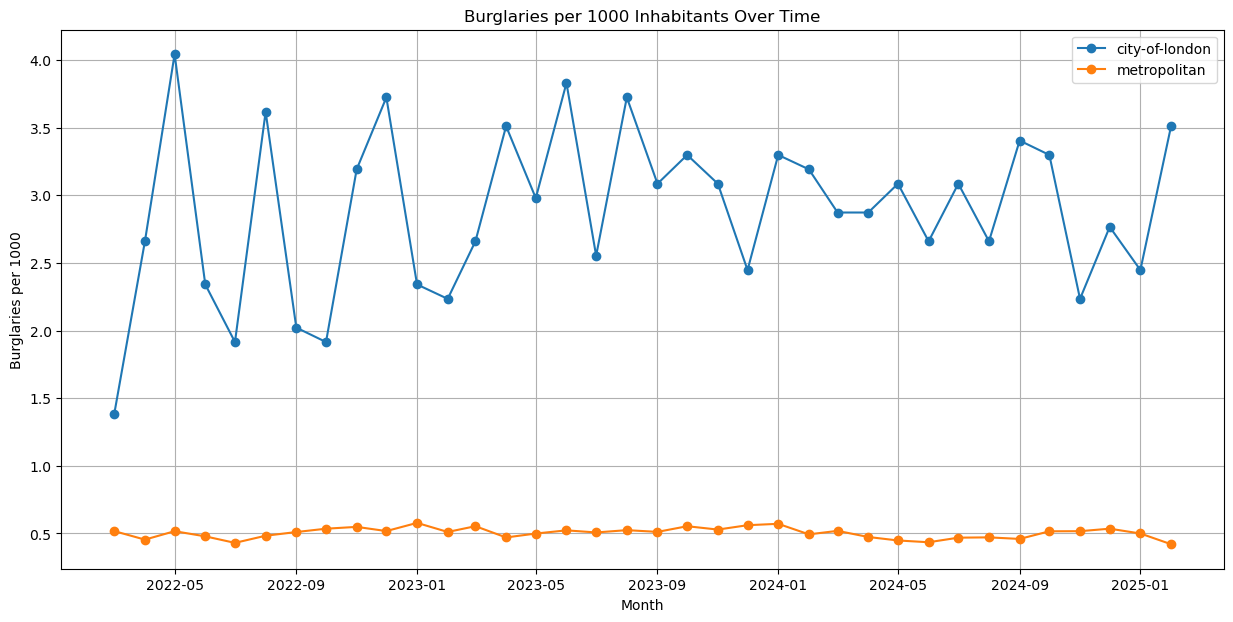


ANNUAL AVERAGE BURGLARY COUNT
   Year           Force  Burglary Count
0  2022  city-of-london       25.200000
1  2022    metropolitan     4440.800000
2  2023  city-of-london       28.000000
3  2023    metropolitan     4686.416667
4  2024  city-of-london       27.750000
5  2024    metropolitan     4379.333333
6  2025  city-of-london       28.000000
7  2025    metropolitan     4092.000000

SEASONALITY - AVERAGE BURGLARY COUNT PER MONTH
    Month_Num           Force  Burglary Count
0           1  city-of-london       25.333333
1           1    metropolitan     4890.000000
2           2  city-of-london       28.000000
3           2    metropolitan     4224.333333
4           3  city-of-london       21.666667
5           3    metropolitan     4715.000000
6           4  city-of-london       28.333333
7           4    metropolitan     4147.333333
8           5  city-of-london       31.666667
9           5    metropolitan     4341.000000
10          6  city-of-london       27.666667
11       

In [23]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Path to the data
base_path = Path('UK_police_data')

# Assumed population
population = {
    "city-of-london": 9400,
    "metropolitan": 8900000
}

# Results
burglary_records = []

# Iterate through folders
for folder in sorted(base_path.glob('2022-*')) + sorted(base_path.glob('2023-*')) + sorted(base_path.glob('2024-*')) + sorted(base_path.glob('2025-*')):
    month = folder.name
    
    for force in ["city-of-london", "metropolitan"]:
        street_files = list(folder.glob(f"*{force}-street.csv"))
        outcomes_files = list(folder.glob(f"*{force}-outcomes.csv"))
        
        outcomes_df = pd.DataFrame()
        if outcomes_files:
            outcomes_df = pd.read_csv(outcomes_files[0])
        
        for file in street_files:
            df = pd.read_csv(file)

            if 'Crime type' not in df.columns:
                continue
            
            burglary_df = df[df['Crime type'] == 'Burglary'].copy()
            burglary_count = len(burglary_df)

            if burglary_count == 0:
                print(f"{month} - {force}: no burglaries")
            else:
                print(f"{month} - {force}: {burglary_count} burglaries")

            # Outcomes
            if not outcomes_df.empty and 'Crime ID' in burglary_df.columns and 'Crime ID' in outcomes_df.columns:
                merged = pd.merge(burglary_df, outcomes_df, on='Crime ID', how='left')
                burglary_with_outcome = merged[~merged['Outcome type'].isna()]
                burglary_outcome_count = len(burglary_with_outcome)
            else:
                burglary_outcome_count = None

            burglary_records.append({
                "Month": month,
                "Force": force,
                "Burglary Count": burglary_count,
                "Burglary with Outcome": burglary_outcome_count,
                "Burglary per 1000": (burglary_count / population[force]) * 1000
            })

# If there are any records:
if burglary_records:
    burglary_df = pd.DataFrame(burglary_records)
    burglary_df['Month'] = pd.to_datetime(burglary_df['Month'], format='%Y-%m')

    # Plot burglary count
    plt.figure(figsize=(15, 7))
    for force in burglary_df['Force'].unique():
        subset = burglary_df[burglary_df['Force'] == force]
        plt.plot(subset['Month'], subset['Burglary Count'], marker='o', label=force)

    plt.title("Burglary Trends Over Time (City of London vs Metropolitan)")
    plt.xlabel("Month")
    plt.ylabel("Burglary Count")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot burglaries per 1000 inhabitants
    plt.figure(figsize=(15, 7))
    for force in burglary_df['Force'].unique():
        subset = burglary_df[burglary_df['Force'] == force]
        plt.plot(subset['Month'], subset['Burglary per 1000'], marker='o', label=force)

    plt.title("Burglaries per 1000 Inhabitants Over Time")
    plt.xlabel("Month")
    plt.ylabel("Burglaries per 1000")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Annual average
    burglary_df['Year'] = burglary_df['Month'].dt.year
    average_per_year = burglary_df.groupby(['Year', 'Force'])['Burglary Count'].mean().reset_index()
    print("\nANNUAL AVERAGE BURGLARY COUNT")
    print(average_per_year)

    # Seasonality
    burglary_df['Month_Num'] = burglary_df['Month'].dt.month
    seasonality = burglary_df.groupby(['Month_Num', 'Force'])['Burglary Count'].mean().reset_index()
    print("\nSEASONALITY - AVERAGE BURGLARY COUNT PER MONTH")
    print(seasonality)

    # Burglaries with outcomes
    burglary_outcomes_summary = burglary_df.dropna(subset=["Burglary with Outcome"]).groupby('Force')['Burglary with Outcome'].sum().reset_index()
    print("\nBURGLARIES WITH SPECIFIED OUTCOME")
    print(burglary_outcomes_summary)

else:
    print("No burglary data in the entire dataset.")



=== Analysis of trends and seasonality: city-of-london ===


<Figure size 1200x800 with 0 Axes>

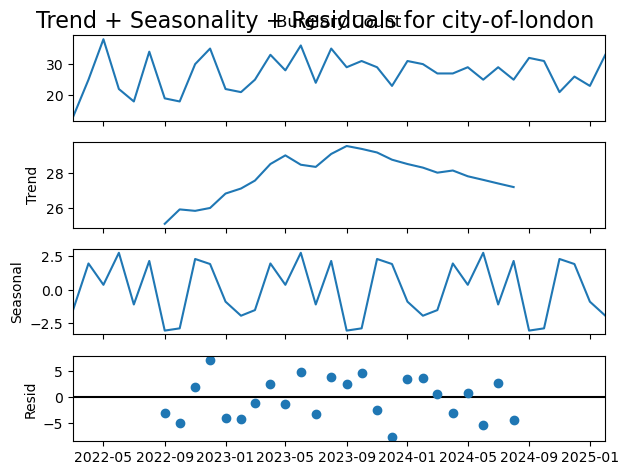

<Figure size 1000x400 with 0 Axes>

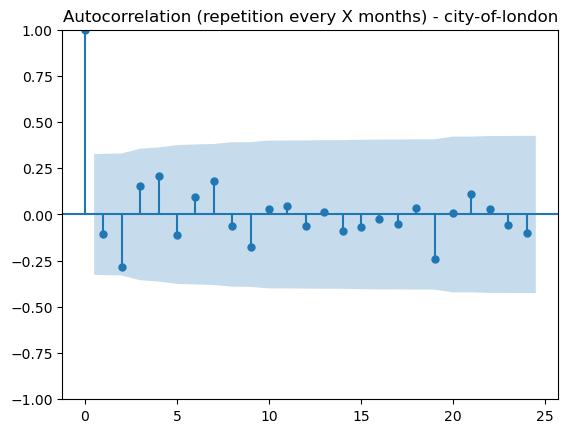

Detected anomalies (unusual months):
Month
2022-03-01    13
Name: Burglary Count, dtype: int64

=== Analysis of trends and seasonality: metropolitan ===


<Figure size 1200x800 with 0 Axes>

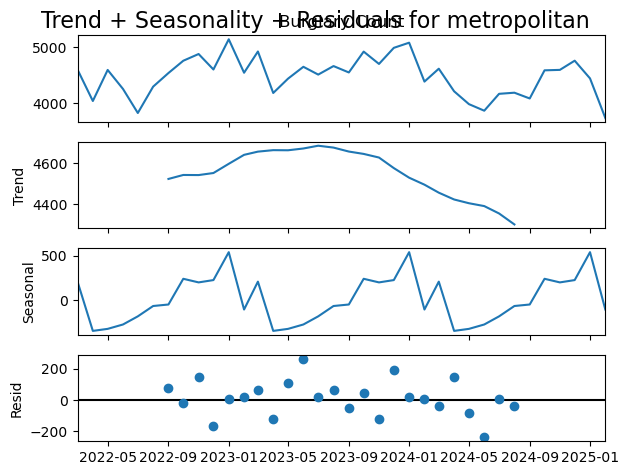

<Figure size 1000x400 with 0 Axes>

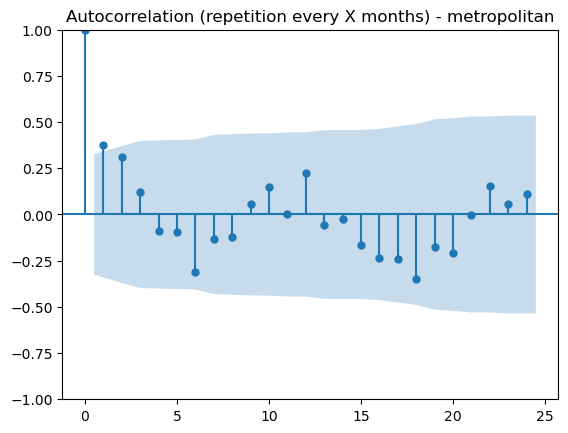

Detected anomalies (unusual months):
Month
2025-02-01    3739
Name: Burglary Count, dtype: int64


In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import numpy as np

# Analysis for each region separately
for force in burglary_df['Force'].unique():
    print(f"\n=== Analysis of trends and seasonality: {force} ===")
    
    # Prepare the time series
    force_data = burglary_df[burglary_df['Force'] == force].copy()
    force_data = force_data.set_index('Month').sort_index()
    
    # Summing burglaries for a given month (already summed)
    ts = force_data['Burglary Count']

    # ---- DECOMPOSITION (trend + seasonality + residuals) ----
    decomposition = seasonal_decompose(ts, model='additive', period=12)
    
    plt.figure(figsize=(12, 8))
    decomposition.plot()
    plt.suptitle(f"Trend + Seasonality + Residuals for {force}", fontsize=16)
    plt.show()

    # ---- AUTOCORRELATION ----
    plt.figure(figsize=(10, 4))
    plot_acf(ts, lags=24)
    plt.title(f"Autocorrelation (repetition every X months) - {force}")
    plt.show()

    # ---- DETECTING ANOMALIES (simple: deviations above 2 std) ----
    mean = ts.mean()
    std = ts.std()
    anomalies = ts[(ts > mean + 2*std) | (ts < mean - 2*std)]

    if anomalies.empty:
        print("No obvious anomalies (outlier months)")
    else:
        print("Detected anomalies (unusual months):")
        print(anomalies)



=== Cycle Analysis (FFT) for city-of-london ===


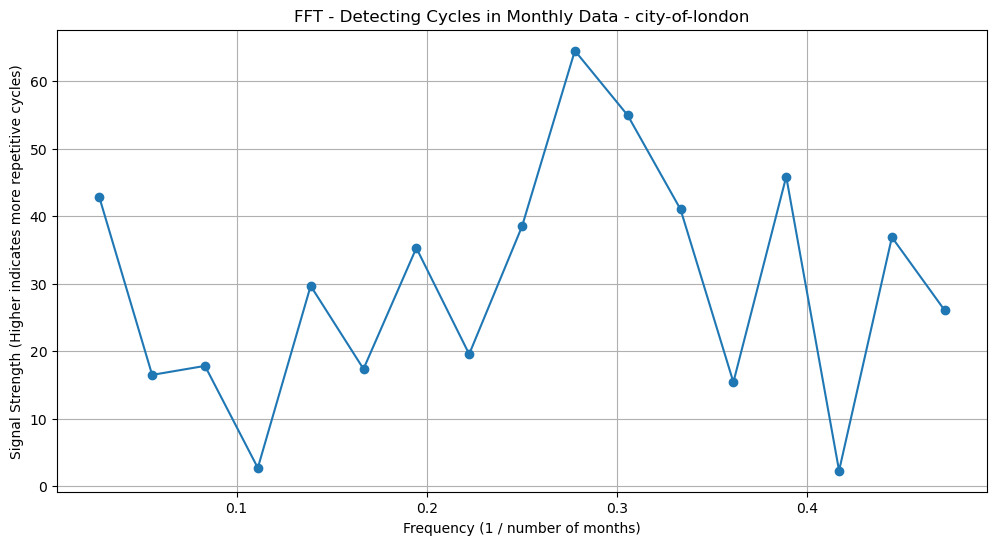

Dominant cycles (in months):
~ every 3.6 months
~ every 3.3 months
~ every 2.6 months

=== Cycle Analysis (FFT) for metropolitan ===


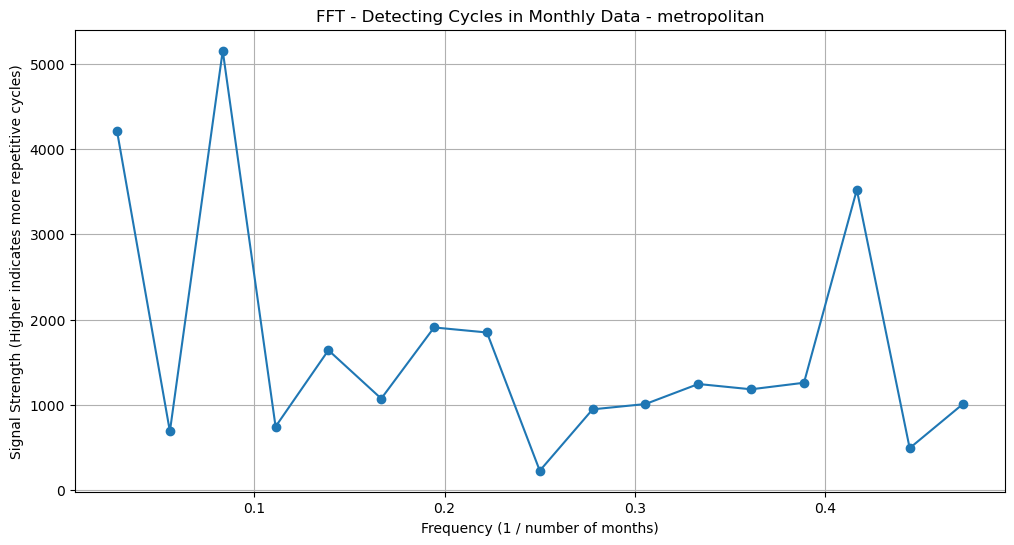

Dominant cycles (in months):
~ every 12.0 months
~ every 36.0 months
~ every 2.4 months


In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Analysis for each region separately
for force in burglary_df['Force'].unique():
    print(f"\n=== Cycle Analysis (FFT) for {force} ===")
    
    # Prepare data
    force_data = burglary_df[burglary_df['Force'] == force].copy()
    force_data = force_data.set_index('Month').sort_index()
    ts = force_data['Burglary Count']

    # Remove NA values
    ts = ts.dropna()

    # Perform FFT
    fft_vals = np.fft.fft(ts)
    fft_freq = np.fft.fftfreq(len(ts), d=1)  # d=1 -> unit is months

    # Take only positive frequencies
    positive_freqs = fft_freq[fft_freq > 0]
    positive_fft_vals = np.abs(fft_vals[fft_freq > 0])

    plt.figure(figsize=(12, 6))
    plt.plot(positive_freqs, positive_fft_vals, marker='o')
    plt.title(f"FFT - Detecting Cycles in Monthly Data - {force}")
    plt.xlabel("Frequency (1 / number of months)")
    plt.ylabel("Signal Strength (Higher indicates more repetitive cycles)")
    plt.grid(True)
    plt.show()

    # Print the most significant cycles
    dominant_cycles = 1 / positive_freqs[np.argsort(-positive_fft_vals)][:3]
    print("Dominant cycles (in months):")
    for cycle in dominant_cycles:
        print(f"~ every {cycle:.1f} months")


In [27]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf

# List to collect the summary
summary_records = []

# Analysis for each region separately
for force in burglary_df['Force'].unique():
    force_data = burglary_df[burglary_df['Force'] == force].copy()
    force_data = force_data.set_index('Month').sort_index()
    ts = force_data['Burglary Count'].dropna()

    # Trend & Seasonality (averages)
    decomposition = seasonal_decompose(ts, model='additive', period=12)
    avg_trend = decomposition.trend.mean()
    avg_seasonal = decomposition.seasonal.mean()

    # Autocorrelation (lag=12 -> annual seasonality)
    autocorr = acf(ts, nlags=12, fft=True)
    autocorr_lag12 = autocorr[12] if len(autocorr) > 12 else None

    # Anomalies (deviation > 2 std)
    mean = ts.mean()
    std = ts.std()
    anomalies_count = len(ts[(ts > mean + 2*std) | (ts < mean - 2*std)])

    # FFT -> dominant cycle
    fft_vals = np.fft.fft(ts)
    fft_freq = np.fft.fftfreq(len(ts), d=1)
    positive_freqs = fft_freq[fft_freq > 0]
    positive_fft_vals = np.abs(fft_vals[fft_freq > 0])
    if len(positive_fft_vals) > 0:
        dominant_cycle = 1 / positive_freqs[np.argmax(positive_fft_vals)]
    else:
        dominant_cycle = None

    # Add to summary
    summary_records.append({
        "Force": force,
        "Average Trend": avg_trend,
        "Average Seasonal": avg_seasonal,
        "Autocorrelation Lag 12": autocorr_lag12,
        "Anomalies Count": anomalies_count,
        "Dominant Cycle (months)": dominant_cycle
    })

# Create DataFrame
summary_df = pd.DataFrame(summary_records)

# Display the summary
display(summary_df)

# Export to CSV (optional - you can comment this out if not needed)
summary_df.to_csv("burglary_time_series_summary.csv", index=False)


,Force,Average Trend,Average Seasonal,Autocorrelation Lag 12,Anomalies Count,Dominant Cycle (months)
0,city-of-london,27.838542,0.000000e+00,-0.063258,1,3.6
1,metropolitan,4551.512153,-1.973730e-15,0.224746,1,12.0


⚡ NOTE: 'ruptures' not installed → Change Point Detection will be skipped.
Install via: pip install ruptures

=== Advanced Time Analysis: city-of-london ===


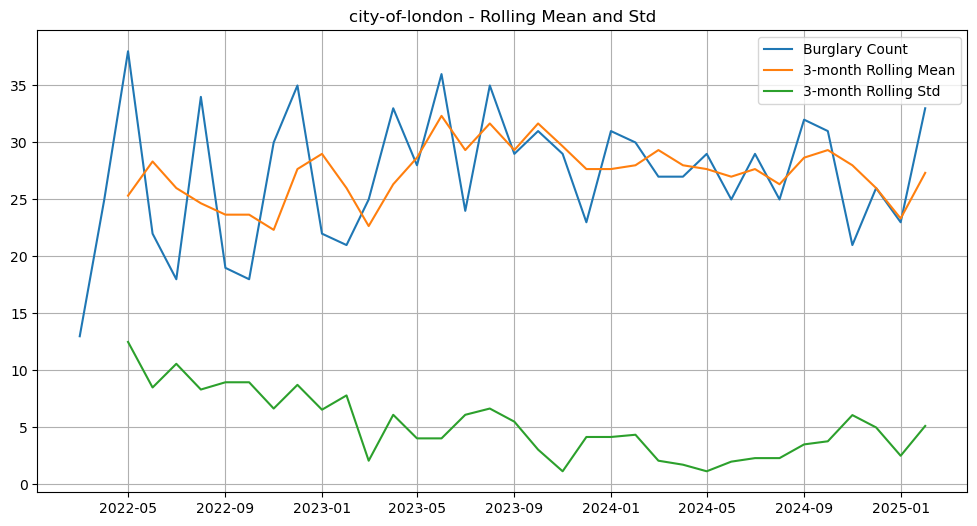

<Figure size 1200x600 with 0 Axes>

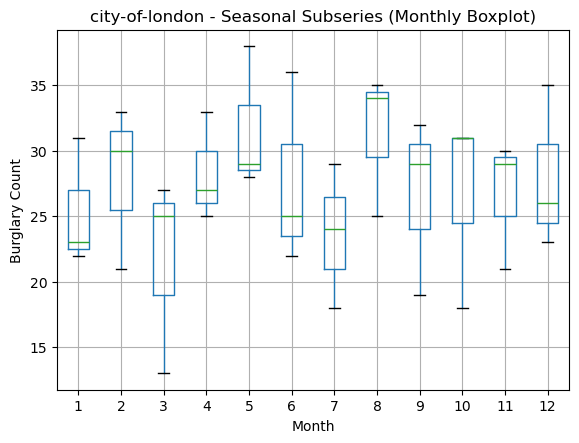

<Figure size 1000x400 with 0 Axes>

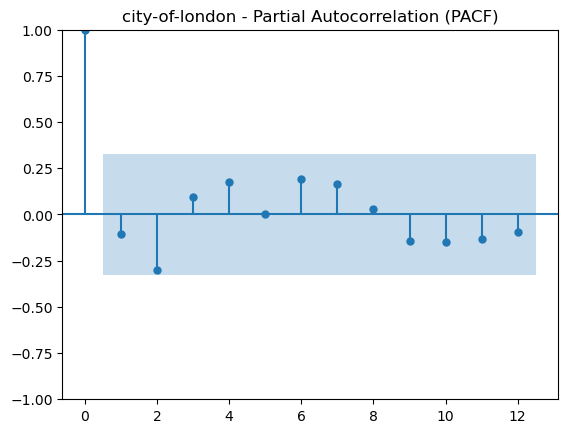


=== Advanced Time Analysis: metropolitan ===


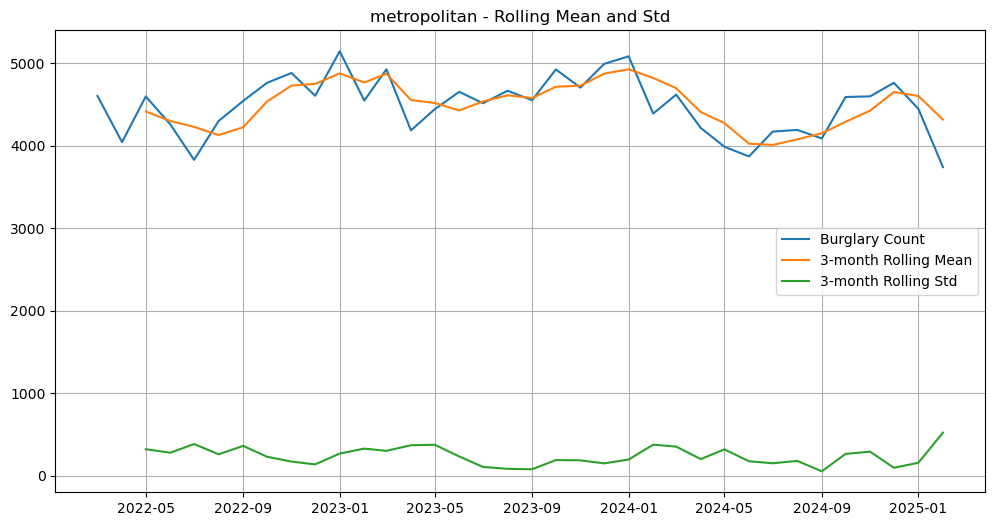

<Figure size 1200x600 with 0 Axes>

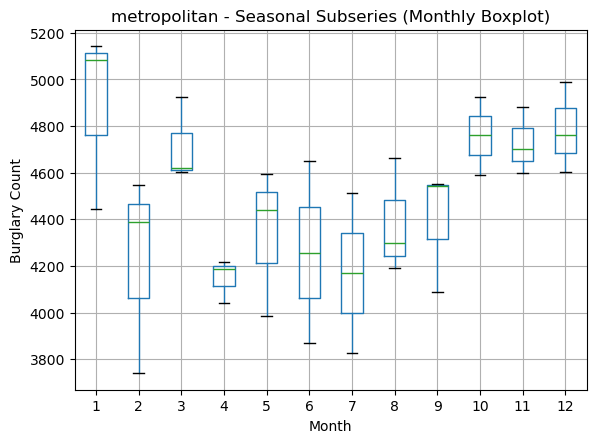

<Figure size 1000x400 with 0 Axes>

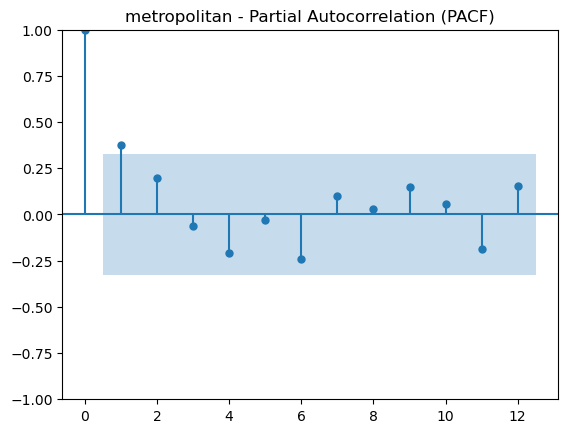

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# OPTIONAL: Install ruptures if not yet installed
try:
    import ruptures as rpt
    ruptures_installed = True
except ImportError:
    ruptures_installed = False
    print("⚡ NOTE: 'ruptures' not installed → Change Point Detection will be skipped.")
    print("Install via: pip install ruptures")

# Advanced Time Analysis
for force in burglary_df['Force'].unique():
    print(f"\n=== Advanced Time Analysis: {force} ===")
    
    force_data = burglary_df[burglary_df['Force'] == force].copy()
    force_data = force_data.set_index('Month').sort_index()
    ts = force_data['Burglary Count'].dropna()

    # 1️⃣ Rolling Statistics
    plt.figure(figsize=(12, 6))
    plt.plot(ts, label='Burglary Count')
    plt.plot(ts.rolling(window=3).mean(), label='3-month Rolling Mean')
    plt.plot(ts.rolling(window=3).std(), label='3-month Rolling Std')
    plt.title(f"{force} - Rolling Mean and Std")
    plt.legend()
    plt.grid(True)
    plt.show()

    # 2️⃣ Change Point Detection (if ruptures is installed)
    if ruptures_installed:
        algo = rpt.Pelt(model="rbf").fit(ts.values)
        result = algo.predict(pen=10)

        plt.figure(figsize=(12, 6))
        plt.plot(ts.values, label='Burglary Count')
        for cp in result:
            plt.axvline(cp, color='red', linestyle='--')
        plt.title(f"{force} - Detected Change Points")
        plt.legend()
        plt.grid(True)
        plt.show()

    # 3️⃣ Seasonal Subseries (boxplot by month)
    force_data['Month_Num'] = force_data.index.month

    plt.figure(figsize=(12, 6))
    force_data.boxplot(column='Burglary Count', by='Month_Num')
    plt.title(f"{force} - Seasonal Subseries (Monthly Boxplot)")
    plt.suptitle("")
    plt.xlabel("Month")
    plt.ylabel("Burglary Count")
    plt.grid(True)
    plt.show()

    # 4️⃣ Partial Autocorrelation (PACF)
    plt.figure(figsize=(10, 4))
    plot_pacf(ts, lags=12, method='ywm')
    plt.title(f"{force} - Partial Autocorrelation (PACF)")
    plt.show()
